## Ada Boost
Ada Boost is a boosting algorithm which is uses a decision stub for making the predictions.

### Why a decision stub?
Decision Stubs are decision trees which uses the max depth of 1. 
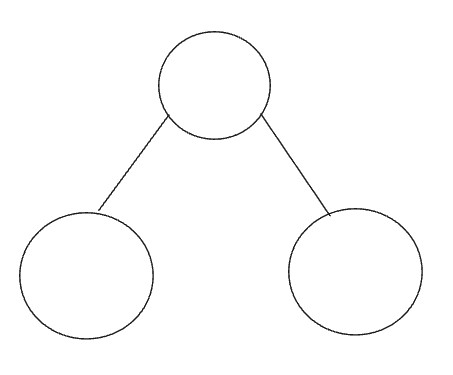

## How is the prediction made in Adaboost?
Adaboost uses decision stubs for making the predicitons.

- ### For classification & Regression
We take make the prediciton using the following formula

A = sign(alpha1*h1(x))
- alpha1 = it is the model weight
- h1(x) = prediciton of the model, ranges between -1 and 1.
- sign is the function which gives the prediction as -1 and +1.


# Training AdaBoost from scratch

In [131]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [132]:
df = pd.DataFrame(
    {
       "x1": [3, 2, 1, 9, 3],
       "x2": [7, 9, 4, 8, 7],
       "y": [1, 0, 1, 0, 0]
    }
)

### Here we create a dummy data.

In [133]:
df

,x1,x2,y
0,3,7,1
1,2,9,0
2,1,4,1
3,9,8,0
4,3,7,0


### Initializing random weights 
wt = 1/(No of rows)

In [134]:
df["weights"] = 1/len(df)
df.head()

,x1,x2,y,weights
0,3,7,1,0.2
1,2,9,0,0.2
2,1,4,1,0.2
3,9,8,0,0.2
4,3,7,0,0.2


In [135]:
def error(err):
    return (1/2)*(np.log((1-err)/err))

def model_wt(df):
    col1 = None
    col2 = None
    error_weights = 0
    for x, y in df.items():
        if x == "y":
            col1 = x

        if x == "y_pred1":
            col2 = x

    for i in range(len(df)):
        if df[col1][i] != df[col2][i]:
            error_weights += df["weights"][i]

    return error(error_weights)
        

In [136]:
from sklearn.tree import DecisionTreeClassifier
X = df.iloc[:, 0:2]
y = df.iloc[:, 2]
dtree = DecisionTreeClassifier(max_depth=1)

In [137]:
dtree.fit(X, y)

,criterion,'gini'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [138]:
y_pred1 = dtree.predict(X)

In [139]:
df["y_pred1"] = y_pred1
df.head()

,x1,x2,y,weights,y_pred1
0,3,7,1,0.2,1
1,2,9,0,0.2,0
2,1,4,1,0.2,1
3,9,8,0,0.2,0
4,3,7,0,0.2,1


In [140]:
y_pred1_alpha = model_wt(df)

In [141]:
def update_weights(df, alpha):
    col1 = None
    col2 = None
    error_weights = 0
    for x, y in df.items():
        if x == "y":
            col1 = x

        if x == "y_pred1":
            col2 = x

    for i in range(len(df)):
        if df[col1][i] != df[col2][i]:
            df.loc[i, "weights"] = df.loc[i, "weights"] * np.exp(alpha)
        else:
            df.loc[i, "weights"] = df.loc[i, "weights"] * np.exp(-(alpha))

    return df

In [142]:
df = update_weights(df, y_pred1_alpha)

In [143]:
df.head()

,x1,x2,y,weights,y_pred1
0,3,7,1,0.1,1
1,2,9,0,0.1,0
2,1,4,1,0.1,1
3,9,8,0,0.1,0
4,3,7,0,0.4,1


In [144]:
#normalize the weights
total_weight = np.sum(df.loc[:, "weights"])
for i in range(len(df)):
    df.loc[i, "norm_weight"] = df.loc[i, "weights"]/total_weight

In [ ]:
df.loc[0, "range"] = df.loc[0, "norm_weight"]
for i in range(1, len(df)):
    df.loc[i, "range"] = df.loc[i-1, "range"] + df.loc[i, "norm_weight"]

In [152]:
df.head()

,x1,x2,y,weights,y_pred1,norm_weight,range
0,3,7,1,0.1,1,0.125,0.125
1,2,9,0,0.1,0,0.125,0.250
2,1,4,1,0.1,1,0.125,0.375
3,9,8,0,0.1,0,0.125,0.500
4,3,7,0,0.4,1,0.500,1.000


In [170]:
random_range = np.random.rand(df.shape[0])
print(random_range)

[0.60485767 0.35861507 0.62742467 0.51349681 0.08771482]


In [220]:
## get new sampled data
def upsampled_data(df, random_range):
    data = []
    
    for i in range(len(random_range)):
        prev = 0
        for j in range(len(df["range"])):
            # print(random_range[i], df["range"][j], prev)
            if prev < random_range[i] and df["range"][j] > random_range[i]:
                data.append(df.iloc[j, :])
            prev = df["range"][j]

    
    cols = ['x1', 'x2', 'y', 'weights', 'y_pred1', 'norm_weight', 'range']
    new_df = pd.DataFrame(data, columns=cols)

    return new_df

In [221]:
upsampled_data(df, random_range).head()

,x1,x2,y,weights,y_pred1,norm_weight,range
4,3.0,7.0,0.0,0.4,1.0,0.500,1.000
2,1.0,4.0,1.0,0.1,1.0,0.125,0.375
4,3.0,7.0,0.0,0.4,1.0,0.500,1.000
4,3.0,7.0,0.0,0.4,1.0,0.500,1.000
0,3.0,7.0,1.0,0.1,1.0,0.125,0.125


In [222]:
## for prediction
## A = np.sign(alpha_1 * pred_1 + alpha_2 * pred_2)